In [1]:
# Classify using Neural Network

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from PIL import Image
image = Image.open("72.png")
image.size

(40, 669)

In [3]:
import os
from PIL import Image
import numpy as np

# Define your directories
directories = ['dataset/DB', 'dataset/DT', 'dataset/HH', 'dataset/HL', 'dataset/LH', 'dataset/LL']

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each directory
for i, dir in enumerate(directories):
    # Loop through each file in the directory
    for filename in os.listdir(dir):
        # Ensure the file is an image
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Open the image file
            img = Image.open(os.path.join(dir, filename))
            # Convert the image to a numpy array and append it to the images list
            images.append(np.array(img))
            # Append the corresponding label to the labels list
            labels.append(i)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
X_train.shape, y_train.shape

((4168, 669, 40, 3), (4168,))

In [5]:
X_train[0]

array([[[166, 160, 180],
        [166, 160, 180],
        [166, 160, 180],
        ...,
        [170, 170, 170],
        [170, 170, 170],
        [170, 170, 170]],

       [[166, 160, 180],
        [166, 160, 180],
        [166, 160, 180],
        ...,
        [170, 170, 170],
        [170, 170, 170],
        [170, 170, 170]],

       [[166, 160, 180],
        [166, 160, 180],
        [166, 160, 180],
        ...,
        [170, 170, 170],
        [170, 170, 170],
        [170, 170, 170]],

       ...,

       [[166, 160, 180],
        [166, 160, 180],
        [166, 160, 180],
        ...,
        [170, 170, 170],
        [170, 170, 170],
        [170, 170, 170]],

       [[166, 160, 180],
        [166, 160, 180],
        [166, 160, 180],
        ...,
        [170, 170, 170],
        [170, 170, 170],
        [170, 170, 170]],

       [[166, 160, 180],
        [166, 160, 180],
        [166, 160, 180],
        ...,
        [170, 170, 170],
        [170, 170, 170],
        [170, 170, 170]]

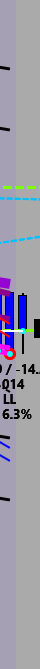

In [6]:
Image.fromarray(X_train[0])

In [7]:
y_train

array([5, 2, 4, ..., 5, 5, 2])

In [8]:
def preprocess_data(X_train, X_test):
    # Normalize the pixel values
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    # # One-hot encode the labels
    # y_train = tf.keras.utils.to_categorical(y_train)
    return X_train, X_test

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define your neural network architecture
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

X_train, X_test = preprocess_data(X_train, X_test) # Preprocess your images here

# Define input shape and number of classes
height, width, channels = image.size[1], image.size[0], 3  # Adjust according to your image dimensions
input_shape = (height, width, channels)  # Adjust according to your image dimensions
num_classes = len(directories)

# Create and compile the model
model = create_model(input_shape, num_classes)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
105/105 [==============================] - 28s 259ms/step - loss: 0.4809 - accuracy: 0.8359 - val_loss: 0.0811 - val_accuracy: 0.9748
Epoch 2/10
105/105 [==============================] - 31s 299ms/step - loss: 0.0495 - accuracy: 0.9859 - val_loss: 0.0258 - val_accuracy: 0.9928
Epoch 3/10
105/105 [==============================] - 27s 256ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0177 - val_accuracy: 0.9964
Epoch 4/10
105/105 [==============================] - 26s 247ms/step - loss: 9.3287e-04 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9964
Epoch 5/10
105/105 [==============================] - 27s 253ms/step - loss: 0.0174 - accuracy: 0.9961 - val_loss: 0.0659 - val_accuracy: 0.9832
Epoch 6/10
105/105 [==============================] - 26s 245ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0127 - val_accuracy: 0.9964
Epoch 7/10
105/105 [==============================] - 26s 250ms/step - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.0089 - va

In [10]:
# Save the model
model.save('mask_model_v2.1.h5')

c:\Users\sehre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# Load the model
model = tf.keras.models.load_model('mask_model_v2.1.h5')

# Make predictions
predictions = model.predict(X_test)
predictions[:5]

# Convert the one-hot encoded predictions to labels
predictions = tf.argmax(predictions, axis=1)
predictions[:5]

# Display the true labels and the predicted labels
true_labels = y_test
print('True labels:', true_labels)
print('Predicted labels:', predictions)


33/33 [==============================] - 2s 51ms/step
True labels: [4 2 3 ... 2 5 2]
Predicted labels: tf.Tensor([4 2 3 ... 2 5 2], shape=(1042,), dtype=int64)


Accuracy: 0.9961612284069098


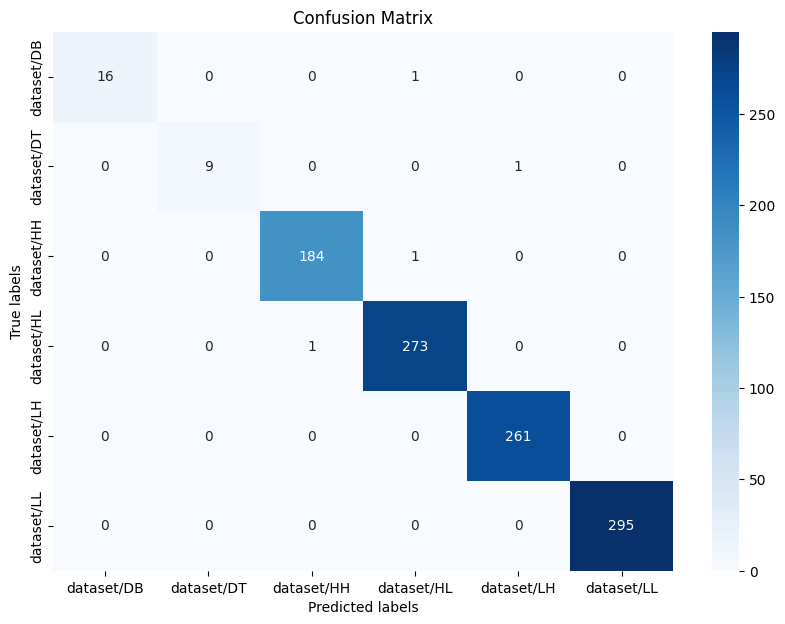

In [14]:
# Calculate the accuracy of the model
accuracy = np.mean(true_labels == predictions)
print('Accuracy:', accuracy)

# Display the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=directories, yticklabels=directories, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Load the model
model = tf.keras.models.load_model('mask_model_v2.1.h5')

# Test the model
img = Image.open('dataset/HH/6991.png')

img = np.array(img)
img = img / 255.0
img = img[np.newaxis, ...]

prediction = model.predict(img)
prediction = np.argmax(prediction)

if prediction == 0:
    print('DT')
elif prediction == 1:
    print('HH')
elif prediction == 2:
    print('HL')
elif prediction == 3:
    print('LH')
else:
    print('LL')


1/1 [==============================] - 0s 61ms/step
HL


In [16]:
import tensorflow as tf
print(tf.__version__)

2.13.1
